In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf


In [2]:
sd = pd.read_csv('Salary_Data.csv')

In [3]:
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


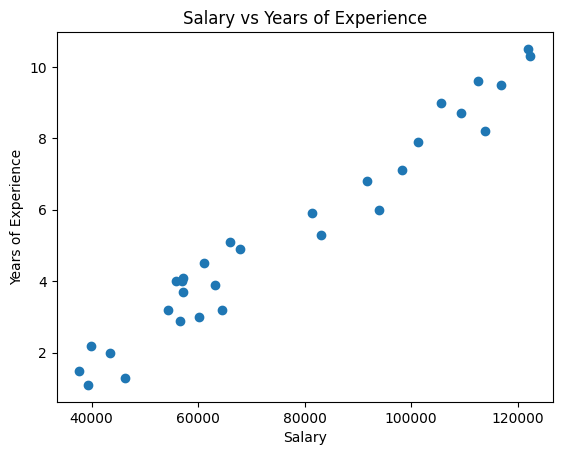

In [6]:
plt.scatter(sd['Salary'], sd['YearsExperience'])
plt.title('Salary vs Years of Experience')
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.show()

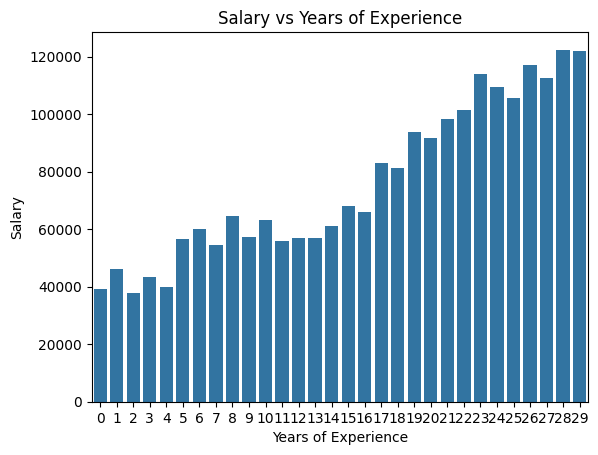

In [7]:
sns.barplot(sd['Salary'])
plt.title('Salary vs Years of Experience')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.show()

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


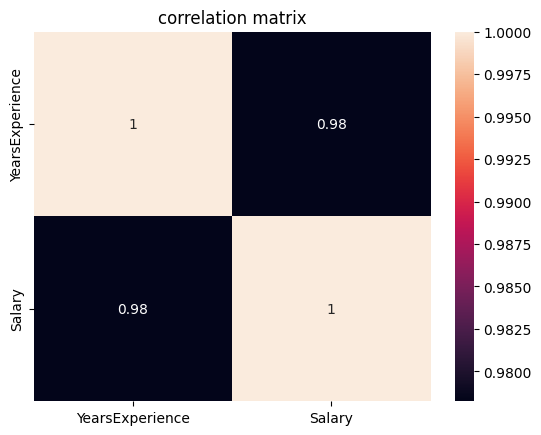

In [32]:
corr = sd.corr()
print(corr)
sns.heatmap(corr,annot= True)
plt.title('correlation matrix')
plt.show()

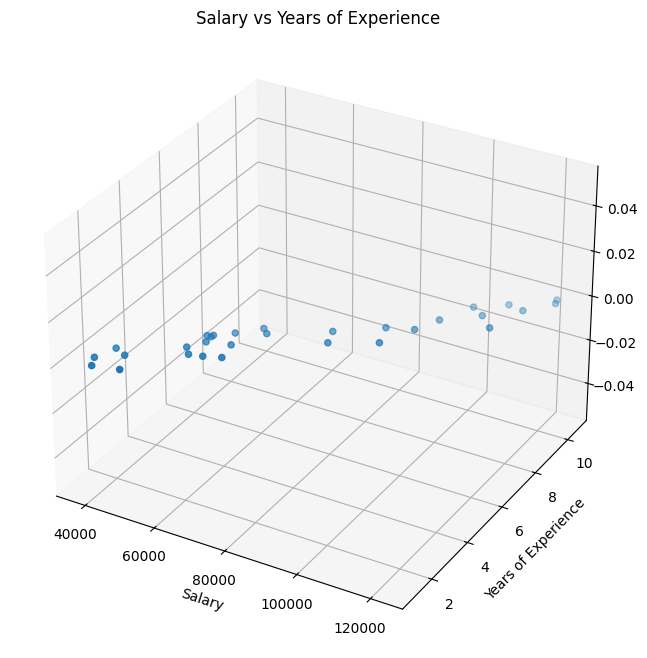

In [24]:
fig= plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(sd['Salary'], sd['YearsExperience'])
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.title('Salary vs Years of Experience')
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

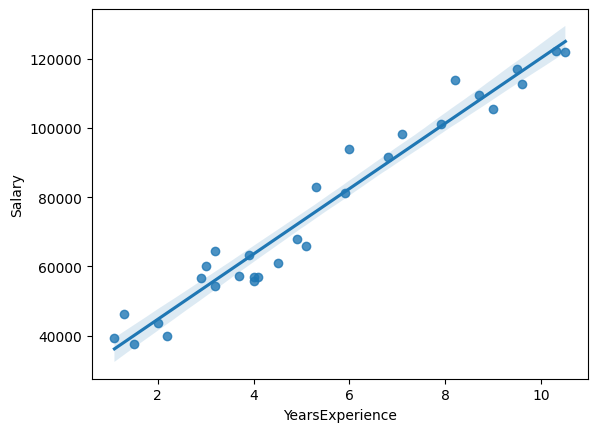

In [34]:
sns.regplot(x = 'YearsExperience', y ='Salary', data = sd)

In [43]:
model = smf.ols('Salary~YearsExperience', data= sd).fit()
model

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        19:43:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* An adjusted R-squared close to 1 indicates a good fit of the model to the data.
* An adjusted R-squared close to 0 suggests that the model does not explain much of the variability in the dependent variable.

# Predict for new data point

In [55]:
newdata=pd.DataFrame({'YearsExperience':[8.0,5.2,3.2,7.1]})
newdata

,YearsExperience
0,8.0
1,5.2
2,3.2
3,7.1


In [60]:
model.predict(newdata)

0    101391.898770
1     74932.004270
2     56032.079627
3     92886.932681
dtype: float64